In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [27]:
#read the data. The dataset was obtained from [CryptoCompare](https://min-api.cryptocompare.com/data/all/coinlist).
file = Path('Resources/crypto_data.csv')
df = pd.read_csv(file)

In [9]:
df.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
466,PROUD,PROUD Money,X11,True,PoW/PoS,0.000000e+00,10000000000
708,ECOC,ECOcoin,Scrypt,True,PoW/PoS,NaN,10733333
33,AMC,AmericanCoin,Scrypt,True,PoW,NaN,168000000
1203,RAIZER,RAIZER,SHA-256,False,PoW,NaN,1000000000
711,ATMOS,Atmos,PoS,True,PoS,1.111358e+08,110290030
207,YAC,YAcCoin,Scrypt,True,PoW,NaN,2000000000
113,IOC,IOCoin,X11,True,PoW/PoS,1.765091e+07,22000000
626,HXX,HexxCoin,Lyra2RE,True,PoW,1.876146e+06,9999999
1013,XT3,Xt3ch,Scrypt,True,PoS,7.630000e+06,44000000
267,MSC,MasterCoin,Scrypt,True,PoW,6.194780e+05,619478


In [29]:
# filter for currencies that are currently being traded. 

crypto_df = df.loc[df['IsTrading'] == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [72]:
#dropped IsTrading column
traded_crypto = crypto_df.drop(columns='IsTrading')
traded_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [73]:
#check null values
traded_crypto.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [74]:
#drop all null values
traded_crypto = traded_crypto.dropna()

In [82]:
#select only coins that are mined (coins>0)
df_final = traded_crypto.loc[traded_crypto['TotalCoinsMined'] > 0]
df_final

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [92]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
mined_curr = traded_crypto[traded_crypto["TotalCoinsMined"] > 0]
mined_curr 

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [120]:
#drop CoinName column
mined_curr1 =mined_curr.drop(columns='CoinName',)
mined_curr1

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [124]:
df_reset=mined_curr1.reset_index(drop=True)
df_reset

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000
2,1337,X13,PoW/PoS,2.927942e+10,314159265359
3,BTC,SHA-256,PoW,1.792718e+07,21000000
4,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
527,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
528,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
529,BDX,CryptoNight,PoW,9.802226e+08,1400222610
530,ZEN,Equihash,PoW,7.296538e+06,21000000


In [126]:
df_reset2=df_reset1.set_index('Unnamed: 0')
df_reset2

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [127]:
df_reset2['Algorithm'].nunique()

71

In [128]:
df_reset2['ProofType'].nunique()

25

In [129]:
df_reset2.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [130]:
#convert TotalCoinSupply column to numeric
df_reset2["TotalCoinSupply"] = pd.to_numeric(df_reset2["TotalCoinSupply"])

In [131]:
df_reset2.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [132]:
#convert 'Algorithm','ProofType' columns to numeric using get_dummies function
df_dumm = pd.get_dummies(df_reset2, prefix='', prefix_sep='',columns=['Algorithm','ProofType'])

In [133]:
print(df_reset2.shape)
print(df_dumm.shape)

(532, 4)
(532, 98)


In [134]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dumm)

df_scaled = pd.DataFrame(scaled_data, columns=df_dumm.columns)
df_scaled.shape

(532, 98)

In [135]:
# Initialize PCA model with 90% preserving the explained variance
pca = PCA(n_components=0.90)

# Get all PCs for the data
pca_data = pca.fit_transform(df_scaled)

# Fetch the explained variances for each PC
pc_vars = pca.explained_variance_
pca_data.shape

(532, 74)

c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in T

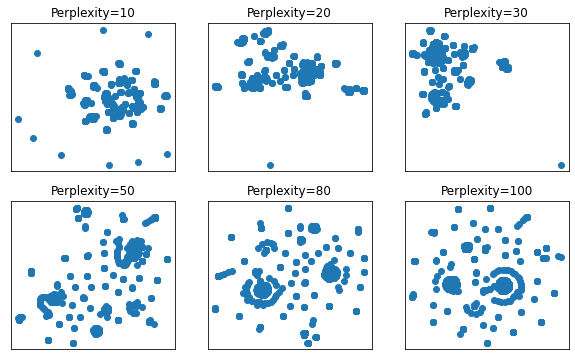

(532, 2)

In [136]:
# Run t-SNE for different values of perplexity with 2 dimensions of embedded space
perplexity_list = [10, 20, 30, 50, 80, 100]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, p in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_features = tsne.fit_transform(pca_data)
    axs[i].scatter(tsne_features[:,0], tsne_features[:,1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Perplexity={p}")
plt.show()
tsne_features.shape

In [59]:
#plot the data
df_final2['x'] = tsne_features[:,0]
df_final2['y'] = tsne_features[:,1]
plt.scatter(df_final2['x'], df_final2['y'], c=tsne_features[:,0])
plt.show()

(532, 441)

c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\ranab\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in T

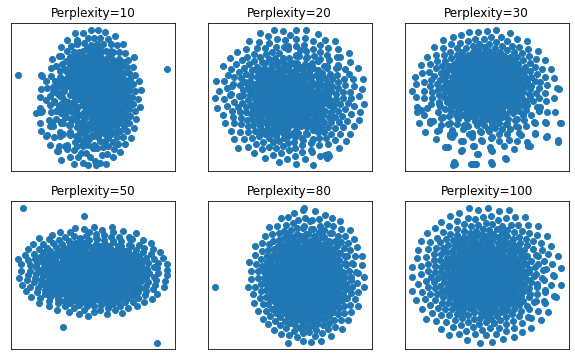

(532, 2)

In [70]:
# Run t-SNE for different values of perplexity with 2 dimensions of embedded space
perplexity_list = [10, 20, 30, 50, 80, 100]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, p in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_features = tsne.fit_transform(pca_data)
    axs[i].scatter(tsne_features[:,0], tsne_features[:,1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Perplexity={p}")
plt.show()
tsne_features.shape

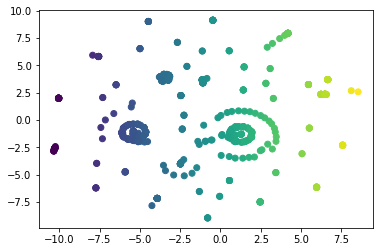

In [137]:
#plot the data
df_dumm['x'] = tsne_features[:,0]
df_dumm['y'] = tsne_features[:,1]
plt.scatter(df_dumm['x'], df_dumm['y'], c=tsne_features[:,0])
plt.show()

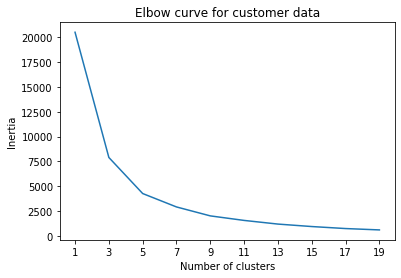

In [138]:
#k-means using tsne_features
inertia = []
k_list = list(range(1, 20,2))

# Calculate the inertia for the range of k values
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
    
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()


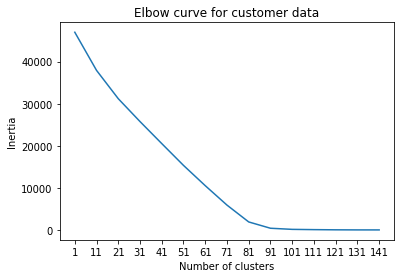

In [139]:
#k-means using pca
inertia = []
k_list = list(range(1, 150,10))

# Calculate the inertia for the range of k values
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [140]:
#make prediction
model = KMeans(n_clusters=5, random_state=0)
model.fit(tsne_features)
predictions = model.predict(tsne_features)

#Concluaion:
    
#The dimensionality reduction technique PCA revealed that 74 features are required to get the model accuracy of 90%. Using k-means algorithm with PCA shows over 80 clusters are required before the elbow curve begins to flatten out. However, after further reducing dimensionality using t-SNE, the number of features reduced to 2. Applying the t-SNE results to k-means model, the elbow curve shows the model can perform reasonably well with 5 clusters. Since k-means should be used with linear data, applying t-SNE will be incorrect. Therefore, if using k-means with PCA it requires a large number of clusters (over 80). The conclude, it would be fair to say the cryptos can not be grouped into distinct clusters using k-means algorithm.